# Importation des packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Importation du dataset

Chaque ligne du dataset représente un client unique et ses coefficients ARIMA

In [ ]:
arima_df = pd.read_csv('clients_clustered_by_arima_coef.csv')
df = arima_df

In [ ]:
df = df[['polynomial_ma_1','polynomial_ar_1']]
df.dropna(axis=0,how='any',inplace=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


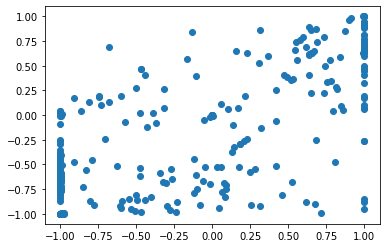

In [ ]:
plt.scatter(df['polynomial_ma_1'],df['polynomial_ar_1'])
plt.show()

In [ ]:
def plotClusters(data, algorithm, args, kwds, showFigure = True):
    model = algorithm(*args, **kwds).fit(data)
    labels = model.labels_
    try:
        sil_score = silhouette_score(data,labels,metric='euclidean')
    except:
        sil_score = -2
        pass
    if showFigure:
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = []
        colors_dict = {}
        for x in labels:
            if x >= 0:
                color = palette[x]
            else:
                color = (0.0, 0.0, 0.0)
            colors.append(color)
            if x not in colors_dict:
                colors_dict[x] = color
        print(colors_dict)
        plt.figure(figsize=(10,5))
        plt.scatter(data['polynomial_ma_1'], data['polynomial_ar_1'], c=colors)
        try:
            plt.scatter(
            x=model.cluster_centers_[:, 0],
            y=model.cluster_centers_[:, 1],
            marker='x',
            c="blue",
            s=128
        )
        except:
            pass
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        plt.title(f"Clusters found by {str(algorithm.__name__)} - silhouette score: {sil_score}")
    return sil_score, model

# DBSCAN

In [ ]:
!pip install hdbscan

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

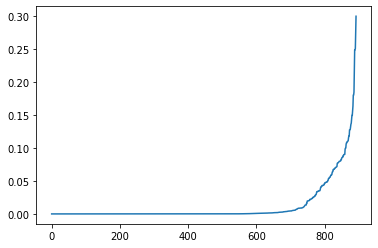

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

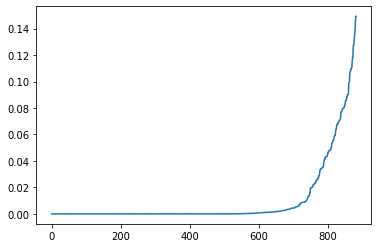

In [ ]:
plt.plot(distances[distances<0.15])

In [ ]:
min_samples_list = np.arange(1,15,1)
eps_list = np.arange(0.01,0.15,0.01)
sil_score_list = [[0 for j in min_samples_list] for i in eps_list]

for i in range(len(eps_list)):
    for j in range(len(min_samples_list)):
        sil_score, labels = plotClusters(df, cluster.DBSCAN, (), {'eps':eps_list[i],'min_samples':min_samples_list[j]},showFigure=False)
        sil_score_list[i][j] = sil_score

In [ ]:
np.argwhere(sil_score_list == max(max(sil_score_list)))

array([[11,  1]])

In [ ]:
eps_list[11]

0.12

In [ ]:
min_samples_list[1]

2

{0: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), -1: (0.0, 0.0, 0.0), 1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), 2: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 3: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 4: (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), 5: (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), 6: (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), 7: (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), 8: (0.8, 0.7254901960784313, 0.4549019607843137), 9: (0.39215686274509803, 0.7098039215686275, 0.803921568627451), 10: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 11: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), 12: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 13: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 14: (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), 15: (0.576

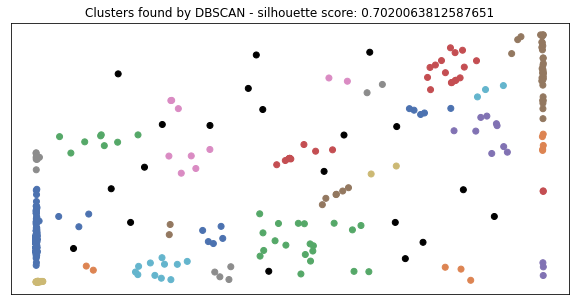

In [ ]:
sil_score, model_DBSCAN = plotClusters(df, cluster.DBSCAN, (), {'eps':0.12,'min_samples':2})

In [ ]:
labels = pd.Series(model_DBSCAN.labels_,index=df.index)

In [ ]:
arima_df['cluster_DBSCAN'] = labels

In [ ]:
arima_df['cluster_DBSCAN'] = arima_df['cluster_DBSCAN'].fillna(len(labels.unique()))

In [ ]:
arima_df.to_csv('clients_clustered_by_arima_coef_DBSCAN.csv',index=False, encoding='utf-8')